## Classic machine learning

#### Analysis of data

In [333]:
# All importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler

In [12]:
# Load and read info from file
url = "/Users/olgatsyban/Downloads/Housing.csv"
df = pd.read_csv(url)
df.sample(3)
#df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
451,3150000,6750,2,1,1,yes,no,no,no,no,0,no,semi-furnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
368,3675000,5640,2,1,1,no,no,no,no,no,0,no,semi-furnished


In [9]:
# Get the size of the DataFrame using the shape attribute
size = df.shape
print(size)

(545, 13)


In [13]:
# Get the data types of all columns using the dtypes attribute
col_types = df.dtypes
print(col_types)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [14]:
# Count the proportion of missing values in each column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df.shape[0]
print("\n",missing_values_proportion)

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [15]:
# Create descriptive statistics using the "describe" method for the new column.
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
# General information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [58]:
# Create maxtrix of correlation for subset of columns
subset_columns = ['area', 'bathrooms', 'bedrooms', 'price']

df_subset = df[subset_columns]
df_correlation_subset = df_subset.corr().round(2)
print(df_correlation_subset)

           area  bathrooms  bedrooms  price
area       1.00       0.19      0.15   0.54
bathrooms  0.19       1.00      0.37   0.52
bedrooms   0.15       0.37      1.00   0.37
price      0.54       0.52      0.37   1.00


Text(0.5, 1.0, 'Price for house depend on amout of bathrooms Corelation. 0.52')

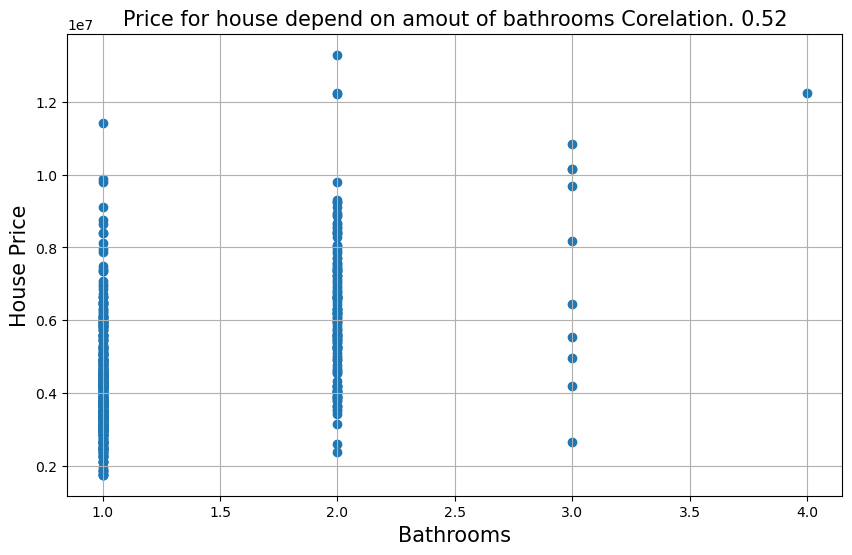

In [60]:
# Build one diagram for implement correlation
plt.figure(figsize=(10,6))
plt.scatter(x='bathrooms', y='price', data=df)
plt.grid(1)
plt.xlabel('Bathrooms', fontsize=15)
plt.ylabel('House Price', fontsize=15)
plt.title(f'Price for house depend on amout of bathrooms Corelation. {df_correlation_subset.price.bathrooms}', fontsize=15)

/Users/olgatsyban/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


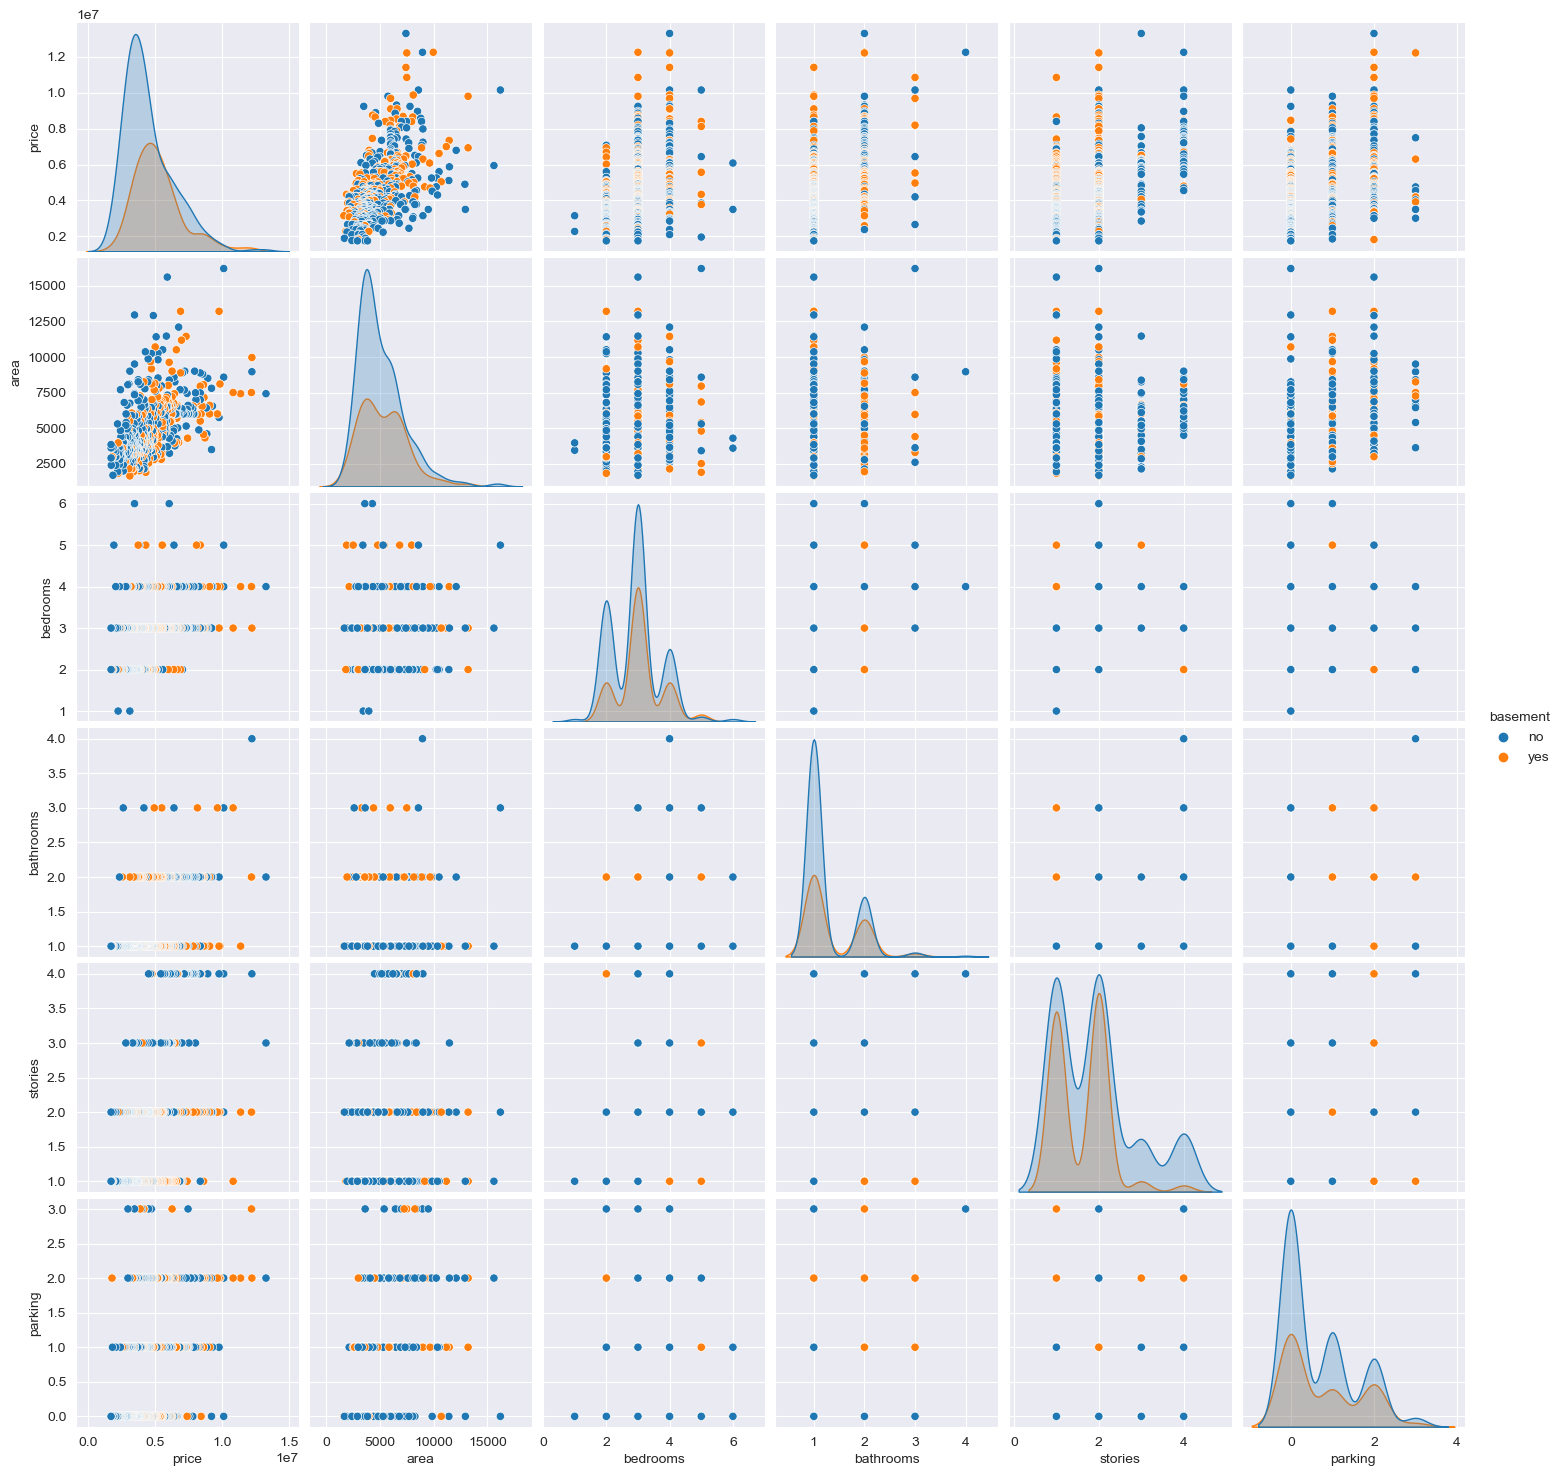

In [64]:
# This visually explore the relationships between different variables in the DataFrame <df>
sns.set_style("darkgrid")
sns.pairplot(df,
             vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
             hue= 'basement')
plt.show()

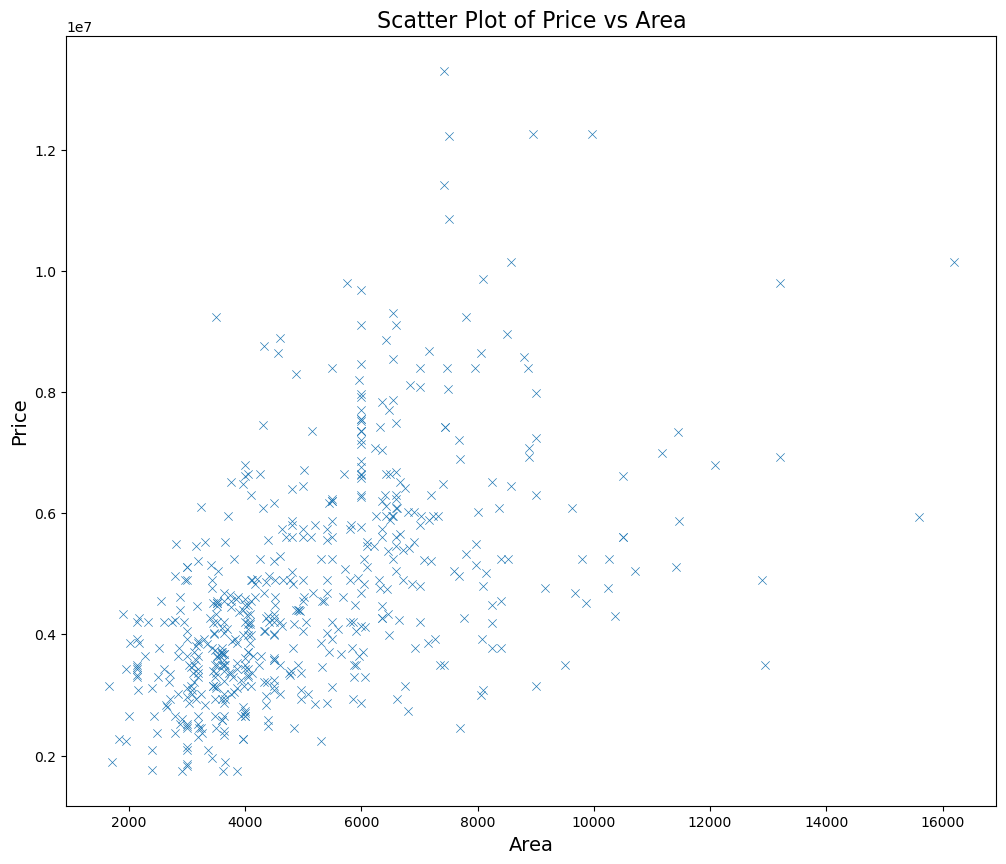

In [21]:
# Build the scatter plot diagram
plt.figure(figsize=(12, 10))
sns.scatterplot(x='area', y='price', data=df, marker='x')
plt.title('Scatter Plot of Price vs Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

#### Write the linear regression hypothesis function in vector form

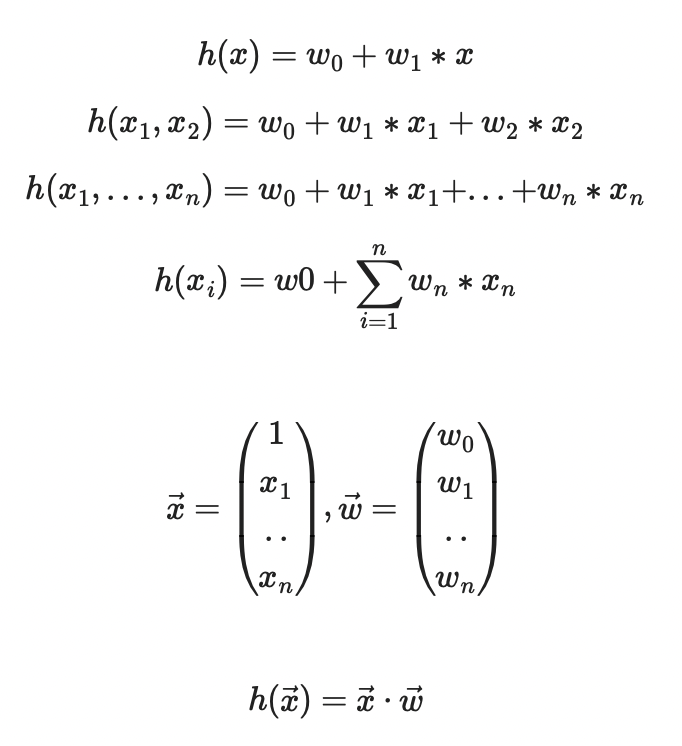

In [34]:
def linear_regression(x_array: np.array, weight_array: np.array):
    return np.dot(x_array, weight_array)

#### Create a function to calculate the loss function in vector form;

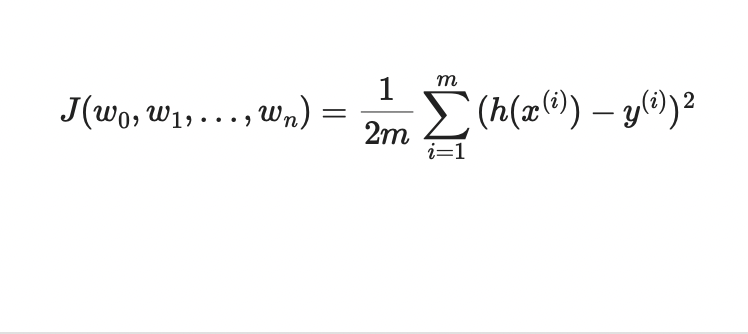

In [ ]:
def loss_funct(weight:np.array, x_matrix:np.array, y:np.array) -> float:
    m = len(y)
    predicted_values = linear_regression(x_matrix, weight)
    return np.sum((predicted_values - y) ** 2) / (2 * m)

#### Implementation one step of gradient descent

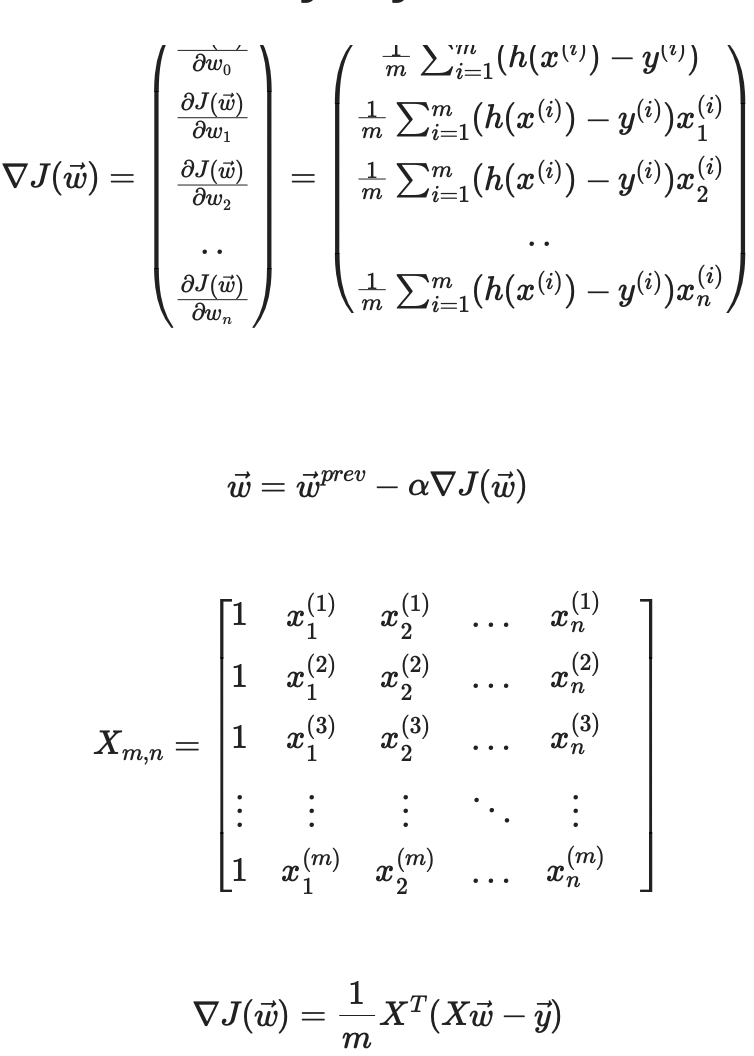

In [110]:
def gradient_descent_step(weight: np.array, x_matrix: np.array, y: np.array, learning_rate: float) -> np.array:
    m = len(y)
    predicted_values = linear_regression(x_matrix, weight)
    gradient = np.dot(x_matrix.T, (predicted_values - y)) / m
    #print("gradient shape ", gradient.shape)
    weight -= learning_rate * gradient
    return weight

In [331]:
# test gradient_descent_step
X2 = df[['area', 'bathrooms', 'bedrooms']] #X2 = df[['area', 'bathrooms']].values
print("X2", x2.shape)
y_1 = df['price']   #y_1 = df['price'].values
res = gradient_descent_step((0.,0.,0.), X2 , y_1, learning_rate=0.00000002499)
print(res)

X2 (545, 3)
[6.67805772e+02 1.65350525e-01 3.65829267e-01]


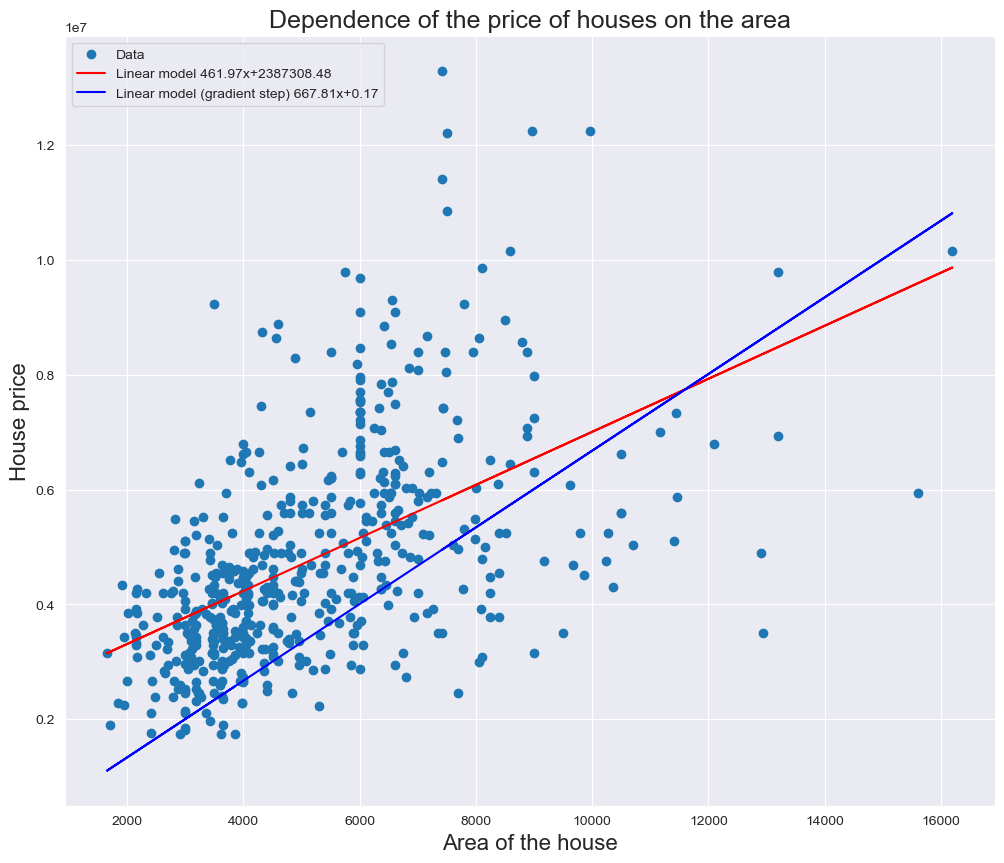

In [332]:
# Create graphic "Dependence of the price of houses on the area"
plt.figure(figsize=(12, 10))

X_a = df['area']
plt.scatter(X_a, y, label='Data')

slope, intercept = np.polyfit(X_a, y, 1)

plt.plot(X_a, X_a * slope + intercept, 'r', label=f'Linear model {slope:.2f}x+{intercept:.2f}')
plt.plot(X_a, X_a * res[0] + res[1], 'b', label=f'Linear model (gradient step) {res[0]:.2f}x+{res[1]:.2f}')

plt.legend(loc='upper left')
plt.xlabel('Area of the house', fontsize=16)
plt.ylabel('House price', fontsize=16)
plt.title('Dependence of the price of houses on the area', fontsize=18)

plt.show()

In [335]:
# Find w parameters in alternative way - with cycles

def find_best_parameters(weight, x_matrix: np.array, y: np.array, learning_rate: float, num_iterations: int) -> np.array:
    scaler = StandardScaler()
    X = scaler.fit_transform(x_matrix)
    m, n = X.shape
    beta = np.zeros((n, 1))
    if isinstance(y, pd.Series):
        y = y.to_numpy()
    if y.ndim == 1:
        y = y.reshape(-1, 1) # Reshape y to a column vector (m x 1)
    
    for _ in range(num_iterations):
        beta = gradient_descent_step(beta, X , y, learning_rate)
    return beta


learning_rate = 0.0001
num_iterations = 10 # here was 1000 iteration
x_matrix = df[['area', 'bathrooms', 'bedrooms']]
print("X shape ", x_matrix.shape)
y = df['price']
# Find the best parameters
best_parameters = find_best_parameters((0.,0.,0.), x_matrix, y, learning_rate, num_iterations)

print("Best parameters: ", best_parameters)

X shape  (545, 3)
Best parameters:  [[1001.04879665]
 [ 966.51122327]
 [ 684.33660067]]


'x_matrix = df[[\'area\', \'bathrooms\', \'bedrooms\']].values\nprint("X shape ", x_matrix.shape)\ny = df[\'price\'].values\nprint("Y shape ", y.shape)\nlearning_rate = 0.01\nnum_iterations = 1000\nbest_parameters = find_best_parameters(x_matrix, y, learning_rate, num_iterations)'

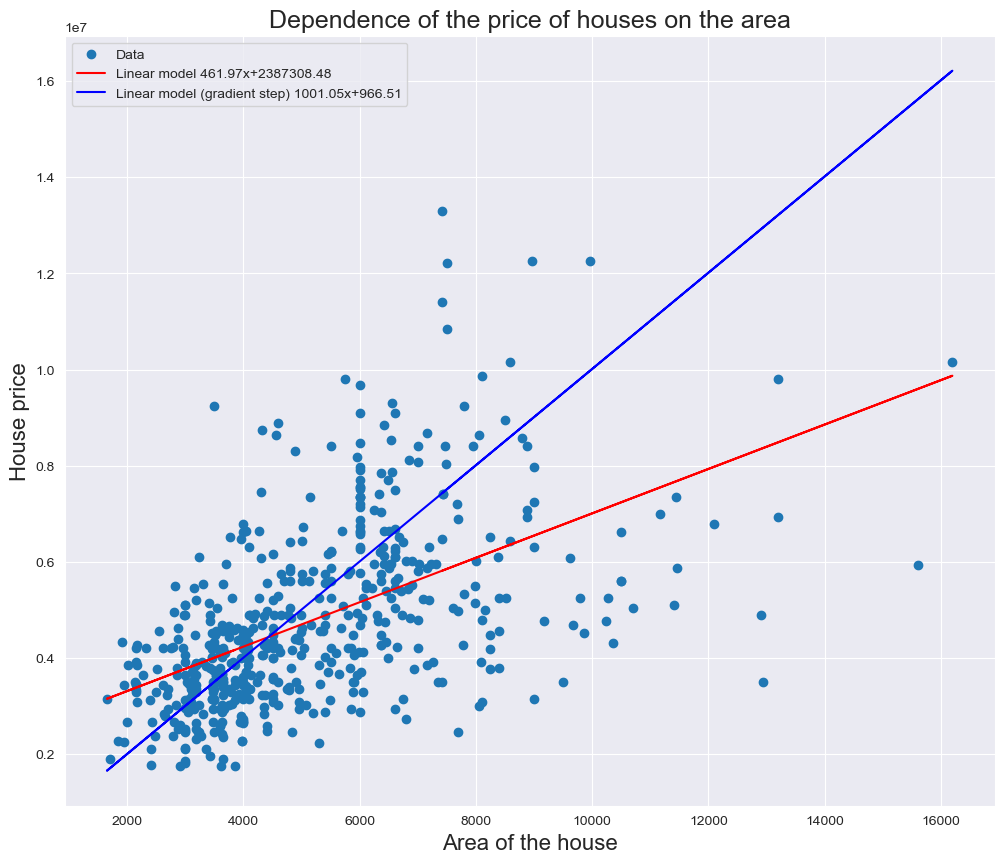

In [283]:
# Graphic 'Dependence of the price of houses on the area' using the data from <find_best_parameters>
plt.figure(figsize=(12, 10))

X_a = df['area']
plt.scatter(X_a, y, label='Data')

slope, intercept = np.polyfit(X_a, y, 1)

plt.plot(X_a, X_a * slope + intercept, 'r', label=f'Linear model {slope:.2f}x+{intercept:.2f}')
plt.plot(X_a, X_a * best_parameters[0][0] + best_parameters[1][0], 'b', label=f'Linear model (gradient step) {best_parameters[0][0]:.2f}x+{best_parameters[1][0]:.2f}')

plt.legend(loc='upper left')
plt.xlabel('Area of the house', fontsize=16)
plt.ylabel('House price', fontsize=16)
plt.title('Dependence of the price of houses on the area', fontsize=18)

plt.show()

#### Find the same parameters using an analytical solution;

In [315]:
def analyticall_method(X, y, include_intercept=True):
    if include_intercept:
        # Add intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
    else:
        X_b = X
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    return theta

parameters_analytical = analyticall_method(x_matrixx, y, include_intercept=True)

print("Parameters obtained analytically:")
print(parameters_analytical)

Parameters obtained analytically:
[-1.73171608e+05  3.78762754e+02  1.38604950e+06  4.06820034e+05]


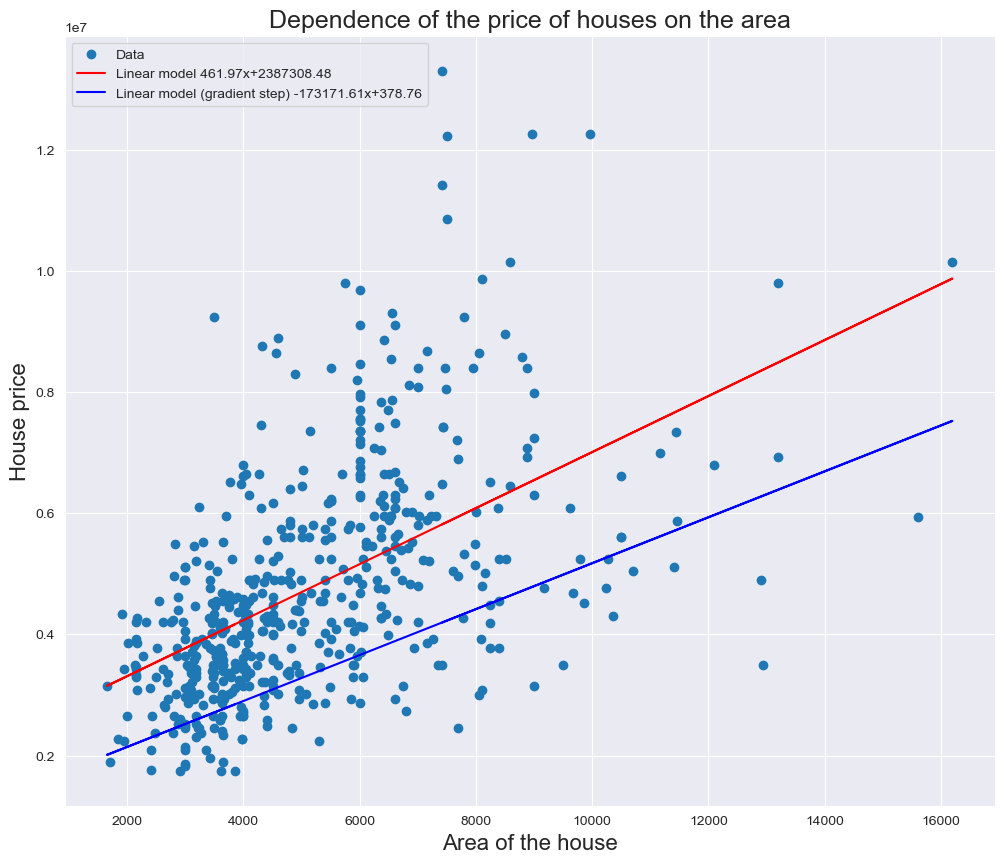

In [316]:
# Graphic 'Dependence of the price of houses on the area' used the result of <analyticall_method>
plt.figure(figsize=(12, 10))

plt.scatter(X_a, y, label='Data')

slope, intercept = np.polyfit(X_a, y, 1)

plt.plot(X_a, X_a * slope + intercept, 'r', label=f'Linear model {slope:.2f}x+{intercept:.2f}')
plt.plot(X_a, X_a * parameters_analytical[1] + parameters_analytical[2], 'b', label=f'Linear model (gradient step) {parameters_analytical[0]:.2f}x+{parameters_analytical[1]:.2f}')

plt.legend(loc='upper left')
plt.xlabel('Area of the house', fontsize=16)
plt.ylabel('House price', fontsize=16)
plt.title('Dependence of the price of houses on the area', fontsize=18)

plt.show()

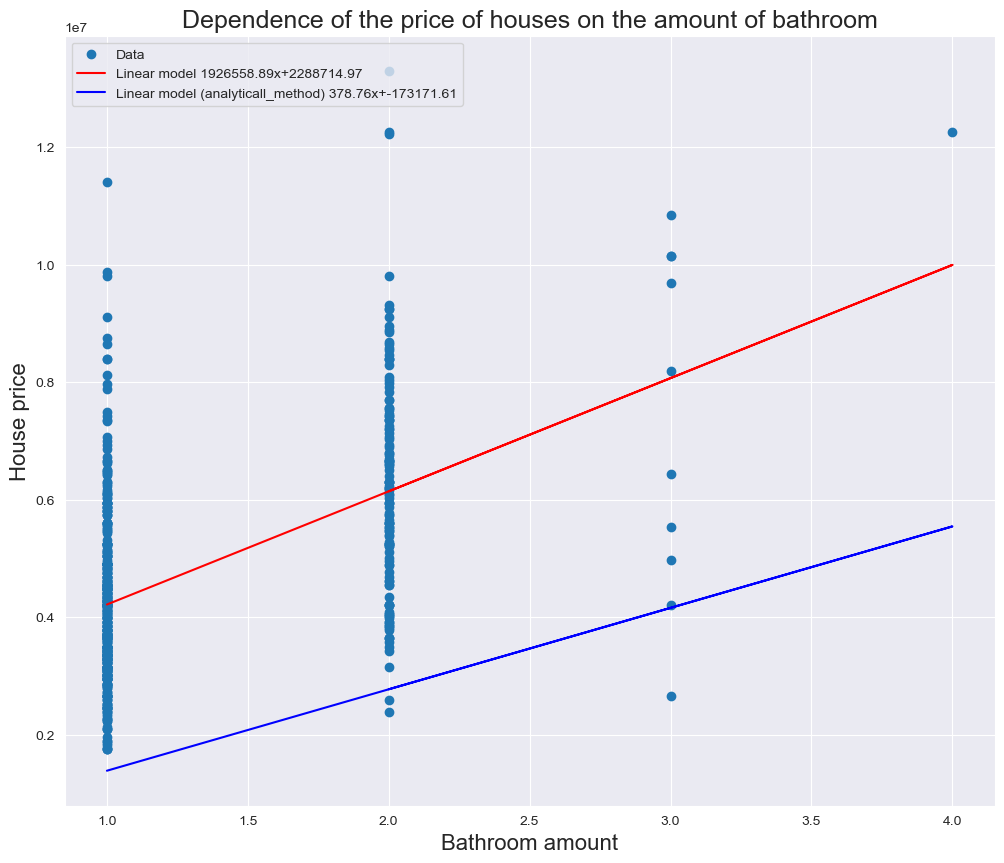

In [336]:
# Graphic 'Dependence of the price of houses on the amount of bathroom' used the result of <analyticall_method>
plt.figure(figsize=(12, 10))

X_b = df['bathrooms']  # Use the number of bathrooms as the independent variable
plt.scatter(X_b, y, label='Data')

slope, intercept = np.polyfit(X_b, y, 1)

plt.plot(X_b, X_b * slope + intercept, 'r', label=f'Linear model {slope:.2f}x+{intercept:.2f}')
plt.plot(X_b, X_b * parameters_analytical[2] + parameters_analytical[1], 'b', label=f'Linear model (analyticall_method) {parameters_analytical[1]:.2f}x+{parameters_analytical[0]:.2f}')

plt.legend(loc='upper left')
plt.xlabel('Bathroom amount', fontsize=16)
plt.ylabel('House price', fontsize=16)
plt.title('Dependence of the price of houses on the amount of bathroom', fontsize=18)

plt.show()


#### Using sklearn

In [325]:
# Initialization 
regressor = LinearRegression()
# You fit the linear regression model to the feature matrix
regressor.fit(x_matrix.values, y)

LinearRegression()

In [292]:
# Accessing the coefficients (weights) of the features
regressor.coef_

array([3.78762754e+02, 1.38604950e+06, 4.06820034e+05])

In [295]:
# Represents the intercept (also known as bias term) of the fitted model
regressor.intercept_

-173171.60763263982

In [296]:
# Concatenates the intercept array with the coefficients array
weigth_scikit = np.concatenate((np.array([regressor.intercept_]), regressor.coef_), axis=0)
weigth_scikit

array([-1.73171608e+05,  3.78762754e+02,  1.38604950e+06,  4.06820034e+05])

In [318]:
# Create a vector representation
rows_x = " \\\\ ".join([ str(p) for p in ['1','area', 'bathrooms', 'bedrooms'] ])
rows_w = " \\\\ ".join([ f"{p:.6f}" for p in weigth_scikit ])
table_content = f"""
$ \\vec{{x}} = \\begin{{pmatrix}}  {rows_x} \\end{{pmatrix}}
,
 \\vec{{w}} = \\begin{{pmatrix}} {rows_w}  \\end{{pmatrix}}$
"""

display(Markdown(table_content))


$ \vec{x} = \begin{pmatrix}  1 \\ area \\ bathrooms \\ bedrooms \end{pmatrix}
,
 \vec{w} = \begin{pmatrix} -173171.607633 \\ 378.762754 \\ 1386049.497791 \\ 406820.033769  \end{pmatrix}$


In [326]:
# Predict the price using the trained model
df_new_house = pd.DataFrame([[3420, 2, 3]], columns=['area', 'bathrooms', 'bedrooms'])

predicted_price = regressor.predict(new_house_features)
print("Predicted price for the house:", predicted_price[0])

Predicted price for the house: 5114756.106517962


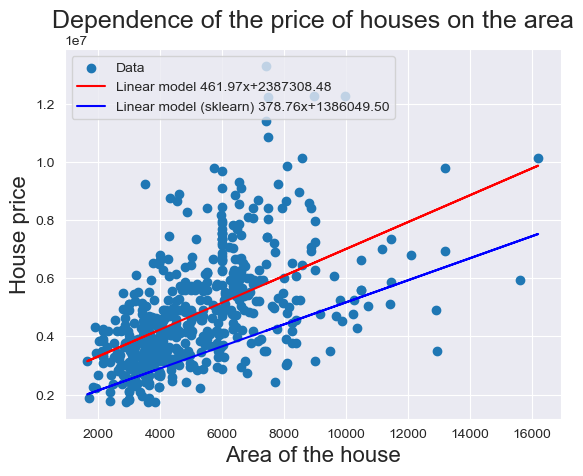

In [330]:
# Graphic 'Dependence of the price of houses on the amount of bathroom' used the result of <sklearn>
coefficients = [3.78762754e+02, 1.38604950e+06, 4.06820034e+05]

plt.scatter(X_a, y, label='Data')

slope, intercept = np.polyfit(X_a, y, 1)

plt.plot(X_a, X_a * slope + intercept, 'r', label=f'Linear model {slope:.2f}x+{intercept:.2f}')
plt.plot(X_a, X_a * coefficients[0] + coefficients[1], 'b', label=f'Linear model (sklearn) {coefficients[0]:.2f}x+{coefficients[1]:.2f}')

plt.legend(loc='upper left')
plt.xlabel('Area of the house', fontsize=16)
plt.ylabel('House price', fontsize=16)
plt.title('Dependence of the price of houses on the area', fontsize=18)

plt.show()